# 작업형 제 2 유형 예시문제

In [230]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [1]:
import os

# os.chdir -> 데이터가 저장된 경로
os.chdir('../../../../data/03_dataq/dataq')

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['README.md', 'X_train.csv', 'mtcars.csv', '.git', 'y_train.csv', 'X_test.csv']

In [208]:
y_train = pd.read_csv('y_train.csv')
X_train = pd.read_csv('X_train.csv',encoding='euc-kr')
X_test  = pd.read_csv('X_test.csv',encoding='euc-kr')

## 데이터 전처리 및 EDA

```{admonition} Question 1
**y_train,X_train데이터를 합쳐 trainDf 변수에 저장하라**
```

In [4]:
trainDf = pd.merge(y_train,X_train)

In [5]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1


```{admonition} Question 2
**trainDf와 X_test의 결측치가 있는 컬럼의 숫자 및 결측치 숫자를 파악하고 결측치처리 방식에 대해 생각해보자**
```

In [6]:
trainNAN = trainDf.isnull().sum()

In [7]:
trainNAN

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [8]:
testNAN = X_test.isnull().sum()

In [9]:
testNAN

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

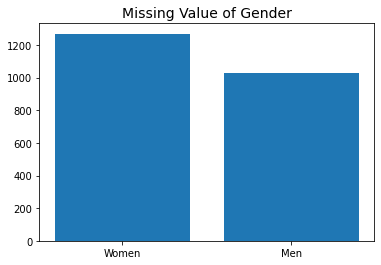

In [10]:
isnullGender = trainDf[trainDf['환불금액'].isnull()].gender.value_counts()

plt.bar(isnullGender.index,isnullGender.values)
plt.xticks([0,1],['Women','Men'])
plt.title("Missing Value of Gender",fontsize=14)
plt.show()

In [11]:
trainDf['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

환블금액의 경우 최솟값이 0이 아니기에, Nan은 결측치가 아닌 환불을 하지않은 경우(0원)로 판단 할수 있다. nan은 0으로 채운다

In [12]:
trainDf['환불금액'] =trainDf['환불금액'].fillna(0)

In [13]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1


```{admonition} Question 3
**범주형 변수의 유일값과 유일값의 갯수를 파악하라**
```

In [25]:
main_index = trainDf['주구매상품'].value_counts().index

In [26]:
print('주구매상품 유일값 수 ',len(main_index))
print('주구매상품 유일값 리스트 ',list(main_index))

주구매상품 유일값 수  42
주구매상품 유일값 리스트  ['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화', '골프', '스포츠', '일용잡화', '모피/피혁', '육류', '남성 캐주얼', '구두', '건강식품', '차/커피', '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장', '생활잡화', '주류', '가구', '커리어', '란제리/내의', '대형가전', '식기', '액세서리', '침구/수예', '보석', '통신/컴퓨터', '소형가전', '악기', '남성 트랜디']


In [27]:
main_center = trainDf['주구매지점'].value_counts().index

In [29]:
print('주구매지점 유일값 수 ',len(main_center))
print('주구매지점 유일값 리스트 ',list(main_center))

주구매지점 유일값 수  24
주구매지점 유일값 리스트  ['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점', '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점', '울산점', '센텀시티점', '전주점', '창원점', '상인점']


In [30]:
trainDf

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [109]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1


In [116]:
t= trainDf

In [132]:
import numpy as np

In [133]:
t.select_dtypes(include=np.number)

,cust_id,gender,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,2,2.000000,0.000000,1
3,3,1,16077620,4935000,0.0,18,2.444444,0.318182,16
4,4,0,29050000,24000000,0.0,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,8,1.625000,0.461538,40
3497,3497,0,75000,75000,0.0,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,0.0,2,1.000000,0.000000,39


In [134]:
numeric = t.select_dtypes(include=np.number).columns[2:]

In [135]:
numeric

Index(['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기'], dtype='object')

총구매액


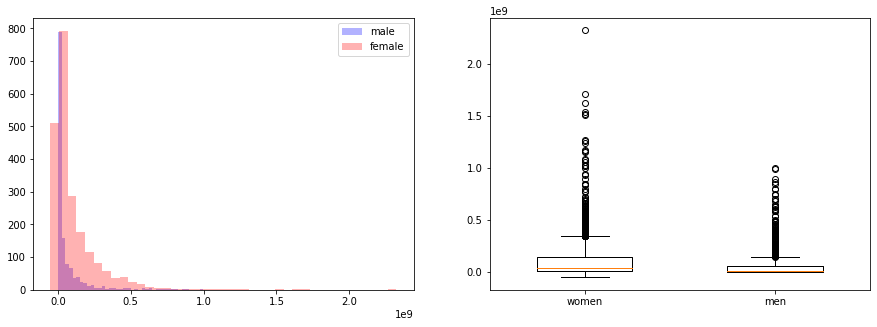

최대구매액


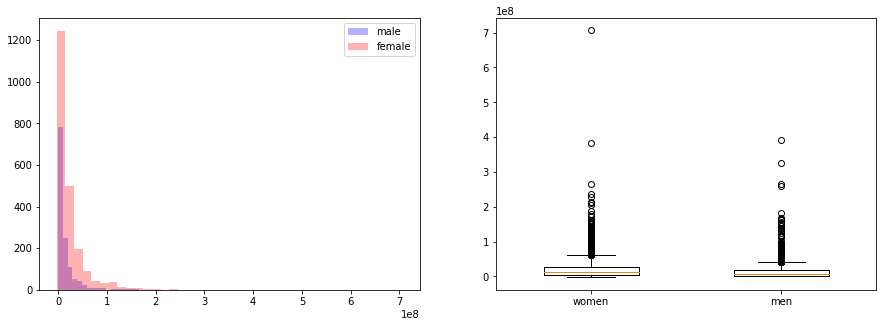

환불금액


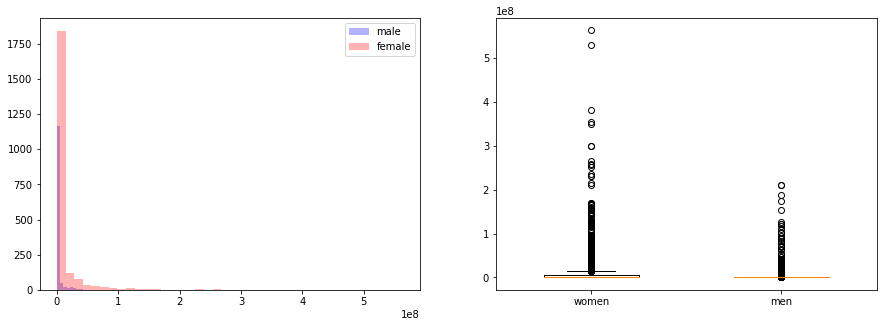

내점일수


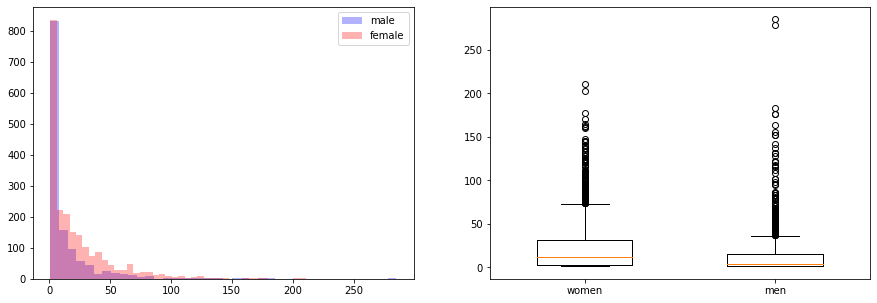

내점당구매건수


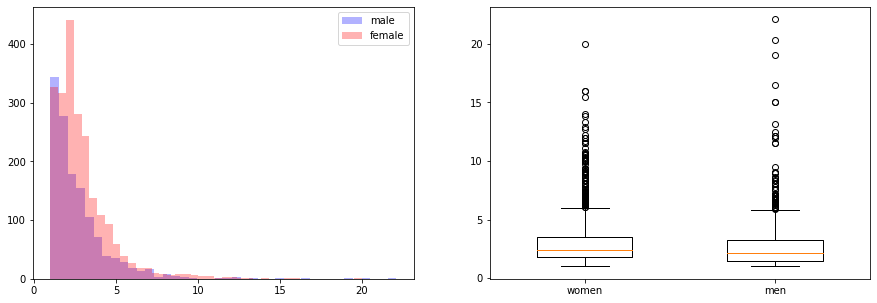

주말방문비율


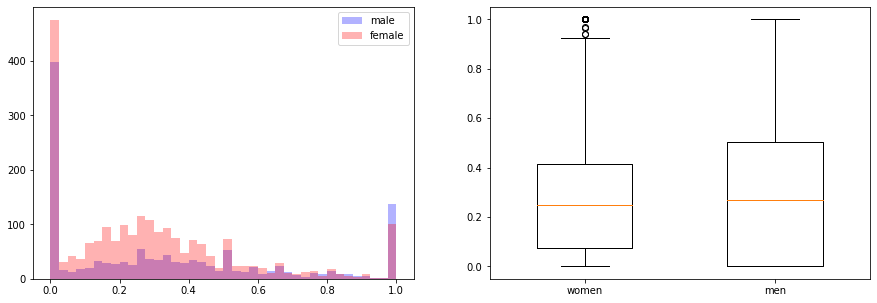

구매주기


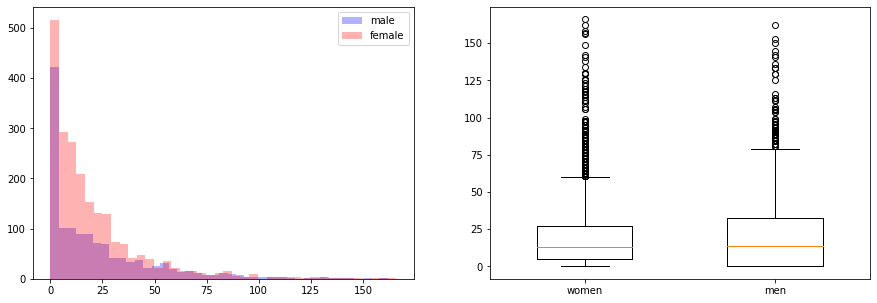

In [187]:
for v in numeric:
    df = t[[v,'gender']]
    
    male = df[df.gender==1]
    female = df[df.gender==0]
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    
    print(v)
    axes[0].hist(male[v],alpha=0.3,color='blue',label='male',bins=40)
    axes[0].hist(female[v],alpha=0.3,color='red',label='female',bins=40)
    axes[0].legend()
    axes[1].boxplot(female[v],positions=[0],widths=0.5)
    axes[1].boxplot(male[v],positions=[1],widths=0.5)
    axes[1].set_xticklabels(['women','men'])
    plt.show()

In [192]:
t

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [202]:
t.groupby('주구매지점').agg(['mean','count'])['총구매액'].sort_values('mean')

,mean,count
주구매지점,,
센텀시티점,1.098891e+07,6
전주점,3.200927e+07,5
안양점,6.055826e+07,29
청량리점,6.346914e+07,86
강남점,7.000790e+07,145
창원점,7.043240e+07,4
미아점,7.294025e+07,69
영등포점,7.298017e+07,241
분당점,7.318428e+07,436


In [204]:
t.주구매지점.unique()

array(['강남점', '잠실점', '관악점', '광주점', '본  점', '일산점', '대전점', '부산본점', '분당점',
       '영등포점', '미아점', '청량리점', '안양점', '부평점', '동래점', '포항점', '노원점', '창원점',
       '센텀시티점', '인천점', '대구점', '전주점', '울산점', '상인점'], dtype=object)

In [216]:
t

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [223]:
pv_t = t.groupby(['주구매지점','주구매상품']).count()['cust_id'].reset_index()

In [225]:
pv_t

,주구매지점,주구매상품,cust_id
0,강남점,가공식품,22
1,강남점,건강식품,2
2,강남점,구두,1
3,강남점,기타,31
4,강남점,남성 캐주얼,1
...,...,...,...
437,포항점,기타,4
438,포항점,모피/피혁,1
439,포항점,시티웨어,2
440,포항점,일용잡화,1


In [309]:
pv_data =pv_t.pivot(index='주구매지점',columns='주구매상품',values='cust_id').fillna(0)
# pv_data = pv_data/pv_data.sum(axis=1)

for v in pv_data.columns:
    pv_data[v] = pv_data[v]/pv_data.sum(axis=1) *100

pv_data

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,
강남점,15.172414,0.000000,1.447467,0.000000,0.726639,22.570648,0.775692,0.000000,0.000000,13.209746,...,0.000000,0.865519,1.733055,0.000000,1.737074,0.000000,0.000000,0.870525,0.871507,7.852356
관악점,6.521739,0.000000,0.000000,0.000000,4.038630,23.273689,4.774481,0.000000,0.000000,15.477830,...,1.350510,0.000000,0.000000,0.000000,2.688295,0.000000,0.000000,0.000000,0.000000,3.995478
광주점,4.385965,0.000000,0.881943,2.648588,1.771220,27.509653,0.000000,0.000000,0.000000,10.073503,...,0.949979,0.000000,1.900861,0.000000,5.707962,0.000000,0.000000,0.000000,0.000000,4.769887
노원점,21.111111,1.085645,1.084637,0.000000,3.250926,27.017587,0.000000,0.000000,1.057643,12.683977,...,1.039607,0.000000,0.000000,0.000000,3.117538,0.000000,0.000000,0.000000,1.037911,3.112510
대구점,28.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.957447,...,0.000000,2.551444,0.000000,0.000000,0.000000,0.000000,0.000000,2.454293,0.000000,0.000000
대전점,20.000000,0.000000,0.000000,7.894737,2.567568,14.019471,0.000000,0.000000,1.227268,4.895419,...,1.157848,0.000000,1.155736,0.000000,3.460977,0.000000,0.000000,0.000000,1.147556,6.873698
동래점,12.244898,0.000000,0.000000,1.810122,3.567923,6.941679,1.651129,0.000000,0.000000,9.801399,...,0.000000,0.000000,0.000000,0.000000,6.755233,1.319750,0.000000,0.000000,1.314204,2.617600
미아점,8.695652,1.394785,0.000000,0.000000,2.774293,34.310153,0.000000,0.000000,0.000000,9.735335,...,1.144846,1.142951,1.141087,0.000000,2.278505,1.135649,0.000000,0.000000,0.000000,1.133903
본 점,19.498607,0.338410,2.149718,3.460261,1.546796,16.887943,2.408335,0.144657,0.869018,11.381814,...,5.202847,7.302816,1.670845,1.013785,7.144450,1.071127,0.000000,2.876146,5.493979,35.670896


In [315]:
pv_data= pv_data.loc[pv_data.index !='상인점']

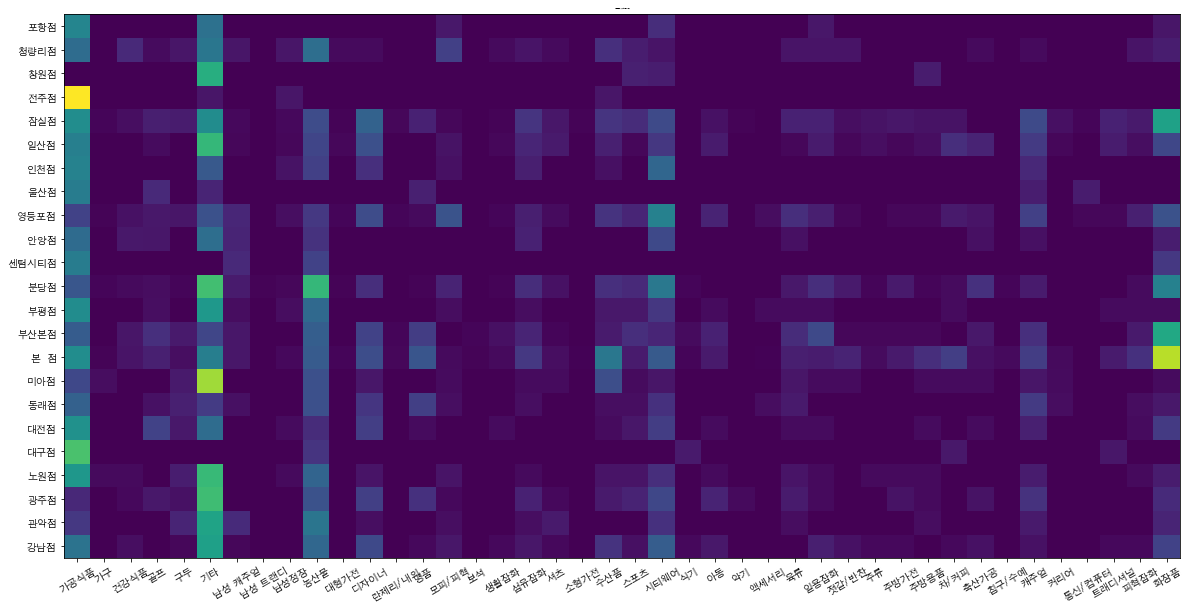

In [316]:
plt.figure(figsize=(20,10))
plt.title('지점별 품목 카테고리 구매 건수',fontsize=1)
plt.pcolor(pv_data)
plt.xticks(np.arange(pv_data.shape[1])+0.5,pv_data.columns,rotation=30)
plt.yticks(np.arange(pv_data.shape[0])+0.5,pv_data.index)
plt.show()

In [317]:
center_gender = t.groupby(['주구매지점','gender']).count()['cust_id'].reset_index().pivot(index='주구매지점',columns='gender',values='cust_id').fillna(0)

In [318]:
center_gender['total']  =center_gender[0] +center_gender[1]

In [319]:
center_gender['ratio']  =center_gender[1] /center_gender['total'] *100

In [320]:
from sklearn.preprocessing import MinMaxScaler

In [321]:
mm = MinMaxScaler()

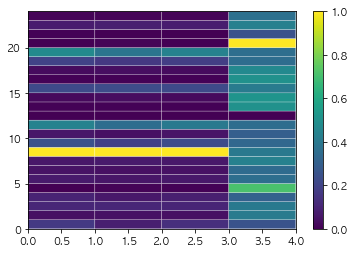

In [322]:
plt.pcolor(mm.fit_transform(center_gender),edgecolor='white')
plt.colorbar()

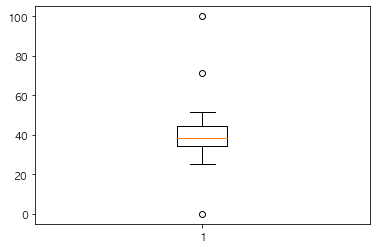

In [324]:
plt.boxplot(center_gender.ratio)
plt.show()

In [280]:
pv_data['ratio'] = center_gender.ratio.values

In [282]:
pv_data

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품,ratio
주구매지점,,,,,,,,,,,,,,,,,,,,,
강남점,22.0,0.0,2.0,0.0,1.0,31.0,1.0,0.0,0.0,17.0,...,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,9.0,25.517241
관악점,3.0,0.0,0.0,0.0,2.0,12.0,3.0,0.0,0.0,10.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,41.304348
광주점,5.0,0.0,1.0,3.0,2.0,31.0,0.0,0.0,0.0,11.0,...,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0,40.350877
노원점,19.0,1.0,1.0,0.0,3.0,25.0,0.0,0.0,1.0,12.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,31.111111
대구점,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,71.428571
대전점,14.0,0.0,0.0,6.0,2.0,11.0,0.0,0.0,1.0,4.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,35.714286
동래점,6.0,0.0,0.0,1.0,2.0,4.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,2.0,34.693878
미아점,6.0,1.0,0.0,0.0,2.0,25.0,0.0,0.0,0.0,8.0,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,43.478261
본 점,210.0,3.0,19.0,30.0,13.0,140.0,17.0,1.0,6.0,78.0,...,23.0,5.0,3.0,21.0,3.0,0.0,8.0,15.0,94.0,40.297122


In [217]:
t['주구매지점'].value_counts()

본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
울산점         6
센텀시티점       6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [218]:
X_test['주구매지점'].value_counts()

본  점     726
잠실점      352
분당점      328
부산본점     168
일산점      158
영등포점     150
강남점      101
광주점       86
청량리점      78
노원점       53
미아점       52
부평점       50
대전점       41
동래점       36
관악점       30
안양점       27
인천점       22
울산점        5
포항점        5
창원점        4
상인점        3
센텀시티점      3
전주점        2
대구점        2
Name: 주구매지점, dtype: int64

In [198]:
t.groupby('주구매지점').mean()['총구매액'].to_frame().sort_values('총구매액')

,총구매액
주구매지점,
센텀시티점,1.098891e+07
전주점,3.200927e+07
안양점,6.055826e+07
청량리점,6.346914e+07
강남점,7.000790e+07
창원점,7.043240e+07
미아점,7.294025e+07
영등포점,7.298017e+07
분당점,7.318428e+07


In [194]:
t.loc[t['최대구매액']==706629000]

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
1626,1626,0,1715219490,706629000,11423000.0,가공식품,본 점,162,2.425926,0.371501,2


In [193]:
t['최대구매액'].max()

706629000

In [191]:
t.groupby(['주구매상품']).mean()

,cust_id,gender,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
주구매상품,,,,,,,,,
가공식품,1699.443223,0.419414,7.573852e+07,1.938905e+07,6.452250e+06,21.749084,3.583988,0.316577,22.946886
가구,1081.500000,0.500000,3.008169e+07,2.549360e+07,1.011060e+06,2.500000,1.170000,0.433333,8.100000
건강식품,1964.297872,0.531915,3.997081e+07,1.150436e+07,8.153681e+05,5.680851,1.439388,0.380636,28.617021
골프,1750.378049,0.536585,1.421196e+08,2.470139e+07,9.161422e+06,15.853659,2.098424,0.398663,18.597561
구두,1916.500000,0.518519,3.136176e+07,7.427265e+06,4.919648e+05,4.518519,1.834178,0.327587,27.592593
기타,1780.317647,0.369748,1.214631e+08,2.374643e+07,8.439859e+06,28.297479,3.799842,0.316960,18.678992
남성 캐주얼,1736.872727,0.763636,4.589379e+07,1.855488e+07,9.382782e+05,5.181818,1.701575,0.267895,24.818182
남성 트랜디,1675.000000,0.500000,2.554195e+08,3.038360e+07,1.256190e+07,34.500000,1.617647,0.753289,2.500000
남성정장,2010.590909,0.818182,1.897295e+07,1.316409e+07,2.048636e+05,2.363636,1.446970,0.366180,28.772727


In [125]:
t['총구매액'].describe()

count    3.500000e+03
mean     9.191925e+07
std      1.635065e+08
min     -5.242152e+07
25%      4.747050e+06
50%      2.822270e+07
75%      1.065079e+08
max      2.323180e+09
Name: 총구매액, dtype: float64

In [118]:
t['주구매지점'].unique()

array(['강남점', '잠실점', '관악점', '광주점', '본  점', '일산점', '대전점', '부산본점', '분당점',
       '영등포점', '미아점', '청량리점', '안양점', '부평점', '동래점', '포항점', '노원점', '창원점',
       '센텀시티점', '인천점', '대구점', '전주점', '울산점', '상인점'], dtype=object)

In [124]:
t['주구매상품'].unique()

array(['기타', '스포츠', '남성 캐주얼', '보석', '디자이너', '시티웨어', '명품', '농산물', '화장품',
       '골프', '구두', '가공식품', '수산품', '아동', '차/커피', '캐주얼', '섬유잡화', '육류',
       '축산가공', '젓갈/반찬', '액세서리', '피혁잡화', '일용잡화', '주방가전', '주방용품', '건강식품',
       '가구', '주류', '모피/피혁', '남성 트랜디', '셔츠', '남성정장', '생활잡화', '트래디셔널',
       '란제리/내의', '커리어', '침구/수예', '대형가전', '통신/컴퓨터', '식기', '소형가전', '악기'],
      dtype=object)

In [123]:
cdf = trainDf.groupby(['주구매지점','주구매상품']).count()['cust_id'].reset_index()


for v in cdf['주구매지점'].unique():
    target = cdf[cdf['주구매지점']==v]
    plt.plot

,주구매지점,주구매상품,cust_id
0,강남점,가공식품,22
1,강남점,건강식품,2
2,강남점,구두,1
3,강남점,기타,31
4,강남점,남성 캐주얼,1
...,...,...,...
437,포항점,기타,4
438,포항점,모피/피혁,1
439,포항점,시티웨어,2
440,포항점,일용잡화,1


In [340]:
trainDf.drop

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,방문당평균구매금액
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,1.399704e+07
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1.602000e+06
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3.197000e+06
3,3,1,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,2.183380e+06
4,4,0,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,2.178750e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,6.350400e+06
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,6.018309e+06
3497,3497,0,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,7.500000e+04
3498,3498,0,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,9.375000e+05


In [326]:
trainDf['방문당평균구매금액'] = trainDf['총구매액']/trainDf['내점일수'] *trainDf['내점당구매건수']

In [327]:
from sklearn.model_selection import train_test_split

In [376]:
x = trainDf.drop(['cust_id','gender','방문당평균구매금액'],axis=1)
y = trainDf.gender

In [377]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [378]:
x_label = x.copy()
for v in ['주구매상품','주구매지점']:
    x_label[v] = le.fit_transform(x_label[v])

In [407]:
x_dum = pd.get_dummies(x)
feature_name_lst= x_dum.columns

In [408]:
from sklearn.preprocessing import StandardScaler

In [409]:
sc = StandardScaler()
x_dum = sc.fit_transform(x_dum)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(x_dum, y, test_size=0.3, random_state=60,stratify=y)

In [411]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
#X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=2, random_state=0)

In [414]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report =classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(report)

              precision    recall  f1-score   support

     class 0       0.74      0.55      0.63       655
     class 1       0.48      0.68      0.56       395

    accuracy                           0.60      1050
   macro avg       0.61      0.61      0.60      1050
weighted avg       0.64      0.60      0.60      1050



In [415]:
from sklearn.metrics import roc_auc_score ,roc_curve

lr_probs = clf.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
lr_auc

0.656857667407479

In [427]:
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [394]:
import lightgbm as lgb
from sklearn.metrics import *
from sklearn.model_selection import KFold

In [444]:

def model_kaggle(train_set,label,feature_name_lst,seed1):
    name = str(datetime.datetime.now())[:-10] +""
    model_name = 'one_que'

    random_seed_change =314
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(train_set, label ,test_size=0.20, random_state=random_seed_change, stratify=label)

    
#     from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

#     pt = PowerTransformer()
#     pt.fit(X_train)                       ## Fit the PT on training data
#     X_train = pt.transform(X_train)    ## Then apply on all data
#     X_test = pt.transform(X_test)



    def learning_rate_010_decay_power_099(current_iter):
        base_learning_rate = 0.1
        lr = base_learning_rate  * np.power(.99, current_iter)
        return lr if lr > 1e-4 else 1e-4

    def learning_rate_010_decay_power_0995(current_iter):
        base_learning_rate = 0.1
        lr = base_learning_rate  * np.power(.995, current_iter)
        return lr if lr > 1e-4 else 1e-4

    def learning_rate_005_decay_power_099(current_iter):
        base_learning_rate = 0.05
        lr = base_learning_rate  * np.power(.99, current_iter)
        return lr if lr > 1e-3 else 1e-3

    def learning_rate_010_decay_power_0996(current_iter):
        base_learning_rate = 0.1
        lr = base_learning_rate  * np.power(.996, current_iter)
        return lr if lr > 1e-4 else 1e-4

    
    fit_params={"early_stopping_rounds":30, 
                "eval_metric" : 'auc', 
                "eval_set" : [(X_test,y_test)],
                'eval_names': ['valid'],
                'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0996)],
                'verbose': 100,
                'categorical_feature': 'auto'}




    param_test ={'num_leaves': sp_randint(6, 50), 
                 'min_child_samples': sp_randint(100, 500), 
                 'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                 'subsample': sp_uniform(loc=0.2, scale=0.8), 
                 'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


    n_HP_points_to_test = 100


    #n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
    clf = lgb.LGBMClassifier(max_depth=-1, random_state=seed1, silent=True, metric='None', n_jobs=4, n_estimators=5000)
    gs = RandomizedSearchCV(
        estimator=clf, param_distributions=param_test, 
        n_iter=n_HP_points_to_test,
        scoring='roc_auc',
        cv=3,
        refit=True,
        random_state=random_seed_change,
        verbose=True)



    gs.fit(X_train, y_train, **fit_params)
    print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

    opt_parameters = gs.best_params_
    clf_final = lgb.LGBMClassifier(**clf.get_params())
    clf_final.set_params(**opt_parameters)

    #Train the final model with learning rate decay
    fit_params_final={"early_stopping_rounds":100, 
                "eval_metric" : 'auc', 
                "eval_set" : [(X_test,y_test)],
                'eval_names': ['valid'],
                'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)],
                'verbose': 100,
                'categorical_feature': 'auto'}
    
    
    
    clf_final.fit(X_train, y_train, **fit_params_final) #,feature_name =feature_name_lst)

    return clf_final


In [454]:
label= y_train_over.values

In [455]:
import datetime

In [456]:
X_train_over.shape

(3058, 73)

In [457]:
w=''

models33 =model_kaggle(X_train_over,label,314,w)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[34]	valid's auc: 0.643935
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.638312
[200]	valid's auc: 0.64071
Early stopping, best iteration is:
[266]	valid's auc: 0.642814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[63]	valid's auc: 0.638318
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.643193
Early stopping, best iteration is:
[156]	valid's auc: 0.645574
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.644464
[200]	valid's auc: 0.647641
Early stopping, best iteration is:
[181]	valid's auc: 0.648148
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.643139
Early stopping, best iteration is:
[100]	valid's auc: 0.643139
Training until validation sc

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[2]	valid's auc: 0.581699
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.64323
Early stopping, best iteration is:
[80]	valid's auc: 0.643999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[45]	valid's auc: 0.645355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[27]	valid's auc: 0.645169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[2]	valid's auc: 0.581699
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.653216
[200]	valid's auc: 0.659543
[300]	val

[300]	valid's auc: 0.654844
[400]	valid's auc: 0.656622
[500]	valid's auc: 0.657989
[600]	valid's auc: 0.658887
Early stopping, best iteration is:
[579]	valid's auc: 0.659186
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[47]	valid's auc: 0.650054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	valid's auc: 0.639017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[12]	valid's auc: 0.635268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	valid's auc: 0.628626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[13]	valid's auc: 0.63513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is

Early stopping, best iteration is:
[207]	valid's auc: 0.667318
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.66059
[200]	valid's auc: 0.667206
[300]	valid's auc: 0.669641
Early stopping, best iteration is:
[274]	valid's auc: 0.670111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid's auc: 0.64873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[26]	valid's auc: 0.615415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[2]	valid's auc: 0.60103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.631899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid's auc: 0.638734
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[30]	valid's auc: 0.631

[400]	valid's auc: 0.659501
Early stopping, best iteration is:
[393]	valid's auc: 0.659682
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.651325
[200]	valid's auc: 0.657413
[300]	valid's auc: 0.661658
[400]	valid's auc: 0.664339
Early stopping, best iteration is:
[386]	valid's auc: 0.664723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[22]	valid's auc: 0.638211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	valid's auc: 0.637063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[46]	valid's auc: 0.625806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[24]	valid's auc: 0.640945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[2]	valid's auc: 0.654278
Training until validation scores don't improve for 30 round

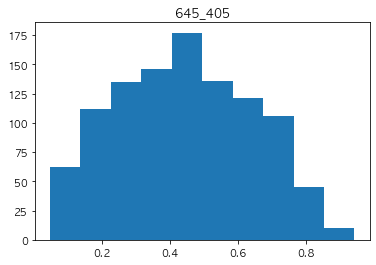

In [458]:

name = str(datetime.datetime.now())[:-10]
name =name.replace("-","_").replace(" ","_").replace(":","_")
mode ='save'
model_name = ''

probabilities = models33.predict_proba(X_test)
res =pd.DataFrame(np.where(probabilities[:,1]>0.5,1,0)).value_counts().values
plt.title(str(res[0])+"_"+str(res[1])+model_name)
plt.hist(probabilities[:,1])
plt.show()


